# SME0822 Análise Multivariada e Aprendizado não-Supervisionado

Por Cibele Russo - ICMC USP

## Aula 5b: Aplicações em Python de testes de hipóteses para o vetor de médias

- Testes de hipóteses para a média populacional (multidimensional)
- Testes para a comparação de médias populacionais em amostras independentes
- Testes para a comparação de médias populacionais em amostras correlacionadas


## Testes de hipóteses para a média (multidimensional)

Seja $\underline{X}_1,\ldots,\underline{X}_n$ uma amostra aleatória de uma distribuição normal p-variada com vetor de médias $\underline{\mu}$ e matriz de variâncias e covariâncias $\Sigma$. Sejam $\overline{\underline{X}}$ e $S$ o vetor de médias amostrais e a matriz de variâncias e covariâncias amostrais.
			
Queremos avaliar se
			
$$\begin{array}{l}H_0:\underline{\mu}=\underline{\mu}_0\mbox{ contra }\\H_1:\underline{\mu}\neq\underline{\mu}_0.\end{array}$$ 
		

Temos que


1. $\overline{\underline{X}}\sim  N_p\left(\underline{\mu},\displaystyle\frac{\Sigma}{n}\right)$.
2. $(n-1)S\sim Wishart(n-1)$.
3. $\overline{\underline{X}}$ e $S$ são independentes. 



Sob $H_0$,  a estatística $T^2$ de Hotelling
$$T^2 = \sqrt{n}(\overline{\underline{X}}-\underline{\mu}_0)^\top \displaystyle\left(\frac{(n-1)S}{n-1}^{-1}\right)\sqrt{n}(\overline{\underline{X}}-\underline{\mu}_0)\sim \displaystyle\frac{(n-1)p}{n-p}F_{p,n-p}$$     
     







### Exemplo: dados banco.csv

O arquivo banco.csv, disponível no E-disciplinas, mostra dados de todos os clientes de um banco de acordo com a descrição a seguir.

- Sexo (1: Feminino, 0: Masculino);
- Idade (em anos);
- CartaodeCredito (1: Sim, 0: Não);
- ChequeEspecial (1: Sim, 0: Não);
- Renda (mensal, em reais);
- LimiteCartaodeCredito (em reais);
- LimiteChequeEspecial (em reais);
- Devedor (1: Sim, 0: Não);
- SaldoDevedor (em reais).




**Exercício 1**

1. Considere uma amostra de tamanho 100. 
2. Teste se o vetor de médias pode ser considerado $\underline{\mu}_0=(0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150)^T$ usando a amostra.
3. Verifique se  $\underline{\mu}_0$ está na região de confiança de $\underline{\mu}$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import random

random.seed(123)

In [3]:
df = pd.read_csv('https://edisciplinas.usp.br/mod/resource/view.php?id=3179488', decimal=',',sep=',', index_col=0)

In [4]:
df.head()

,Sexo,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor,SaldoDevedor
ID,,,,,,,,,
1,0,26,0,0,2471.51,0.00,0.00,0.0,0.00
2,1,25,1,1,2781.90,4172.85,2781.90,0.0,0.00
3,0,29,0,0,2567.38,0.00,0.00,0.0,0.00
4,1,29,1,0,3329.50,4994.24,0.00,0.0,0.00
5,1,19,0,1,2074.08,0.00,2074.08,1.0,5887.33


In [5]:
# Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

from scipy.stats import f


In [6]:
def T2Hotelling(df, mu0, n, p):
    Xbarra=df.mean()
    S = df.cov()
    S_inv = np.linalg.inv(S)
    T2Hotelling = n*np.array(Xbarra-mu0).T.dot(S_inv).dot(np.array(Xbarra-mu0))
    qf = f.ppf(0.95, p , n-p, loc=0, scale=1)
    teste = T2Hotelling > (n-1) * p / (n-p) * qf
    pvalor = 1-f.cdf(T2Hotelling/((n-1) * p / (n-p) ), p, n-p)
    print('Rejeitamos H0') if teste else print('Não rejeitamos H0')
    print('Valor da estatística', T2Hotelling)
    print('valor p', pvalor)
    

In [7]:
df_amostra = df.sample(100)

In [8]:
mu0 = [0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150]
n=len(df_amostra)
p=len(df_amostra.columns)

T2Hotelling(df_amostra, mu0, n, p)

Não rejeitamos H0
Valor da estatística 14.271963352833856
valor p 0.1758534221481306


In [11]:
df_amostra.mean()

Sexo                        0.3100
Idade                      30.2300
CartaodeCredito             0.5100
ChequeEspecial              0.4000
Renda                    2987.6827
LimiteCartaodeCredito    2297.4788
LimiteChequeEspecial     1190.2413
Devedor                     0.2800
SaldoDevedor             2948.8496
dtype: float64

**Região de confiança**

In [14]:
Xbarra = df_amostra.mean()
mu0 = [0.3, 30, 0.48, 0.43, 3000, 2100, 1240, 0.28, 2150]
S_inv = np.linalg.inv(df_amostra.cov())
n = len(df_amostra)

Teste = n*np.array(Xbarra-mu0).T.dot(S_inv).dot(np.array(Xbarra-mu0)) < (n-1) * p / (n-p) * f.ppf(0.95, p , n-p, loc=0, scale=1)

print('Resultado: mu0 está na região de confiança de mu') if(Teste) else print('Resultado: mu0 não está na região de confiança de mu')
    

Resultado: mu0 está na região de confiança de mu


## Testes de hipóteses para a comparação de médias em amostras independentes

Sejam 

- $\underline{X}_{11},\ldots,\underline{X}_{1n_1}$ vetores aleatórios $p\times 1$ referentes a uma população com  $E(\underline{X}_{1j})=\underline{\mu}_1$ para $j=1,\ldots,n_1$,
- $\underline{X}_{21},\ldots,\underline{X}_{2n_2}$ vetores aleatórios $p\times 1$ referentes a uma população com  $E(\underline{X}_{2j})=\underline{\mu}_2$ para $j=1,\ldots,n_2$,

supondo que a população 1 é independente da população 2.


Deseja-se avaliar as hipóteses 

$\begin{array}{l}H_0:\underline{\mu}_1=\underline{\mu}_2\mbox{ contra }\\H_1:\underline{\mu}_1\neq\underline{\mu}_2\end{array}$

Primeiramente, consideramos um estimador para $\Sigma$, por exemplo
			   
$S= S_{pooled} = \displaystyle\frac{\displaystyle\sum_{j=1}^{n_1} (\underline{X}_{1j}-\overline{\underline{X}}_1)(\underline{X}_{1j}-\overline{\underline{X}}_1)^\top + \displaystyle\sum_{j=1}^{n_2}(\underline{X}_{2j}-\overline{\underline{X}}_2)(\underline{X}_{2j}-\overline{\underline{X}}_2)^\top}{n_1+n_2-2}$
			
ou seja
			
$S_{pooled} = \displaystyle\frac{(n_1-1)S_1 + (n_2-1)S_2}{n_1+n_2-2}$
			


			
Então, reescrevemos as hipóteses de interesse na forma mais geral
			
$\begin{array}{l}H_0:\underline{\mu}_1-\underline{\mu}_2=\underline{\delta}_0\mbox{ contra } \\  \ H_1:\underline{\mu}_1-\underline{\mu}_2\neq\underline{\delta}_0.\end{array}$
			   
               
e rejeitamos $H_0$ ao nível de significância $\alpha$ se

$T^2_{obs} = (\overline{\underline{X}}_1-\overline{\underline{X}}_2-\underline{\delta}_0)\left[\left(\displaystyle\frac{1}{n_1}+\frac{1}{n_2}\right)S \right]^{-1}(\overline{\underline{X}}_1-\overline{\underline{X}}_2-\underline{\delta}_0) > c^2$

com $c^2 = \displaystyle\frac{(n_1+n_2-2)p}{n_1+n_2-p-1} q_{F_{p,n_1+n_2-p-1,\alpha}}.$
			
            
          

  
Se as hipóteses de interesse são

			
$\begin{array}{l}H_0:\underline{\mu}_1=\underline{\mu}_2\mbox{ contra } \ H_1:\underline{\mu}_1\neq\underline{\mu}_2\end{array}$
			   
               
então a estatística se simplifica, sob $H_0$, em
			
            
$T^2 =  ( \overline{\underline{X}}_1 - \overline{\underline{X}}_2 )^\top \displaystyle\frac{S_{pooled}^{-1}}{n_1+n_2-2 }  ( \overline{\underline{X}}_1 - \overline{\underline{X}}_2 ) \sim \displaystyle\frac{(n_1+n_2-2)p}{n_1+n_2-p-1} F_{p,n_1+n_2-p-1}.$                        
		

**Exercício 2**

1. Considere que a primeira população é composta por mulheres e a segunda população é composta por homens. Com base na amostra obtida no Exercício 1, verifique se os vetores de médias podem ser considerados iguais.

**Médias amostrais**

In [15]:
df_amostra[df_amostra['Sexo']==0].mean()

Sexo                        0.000000
Idade                      30.579710
CartaodeCredito             0.376812
ChequeEspecial              0.188406
Renda                    3029.261449
LimiteCartaodeCredito    1728.385797
LimiteChequeEspecial      587.988841
Devedor                     0.362319
SaldoDevedor             3241.563043
dtype: float64

In [16]:
df_amostra[df_amostra['Sexo']==1].mean()

Sexo                        1.000000
Idade                      29.451613
CartaodeCredito             0.806452
ChequeEspecial              0.870968
Renda                    2895.136452
LimiteCartaodeCredito    3564.169677
LimiteChequeEspecial     2530.738710
Devedor                     0.096774
SaldoDevedor             2297.326129
dtype: float64

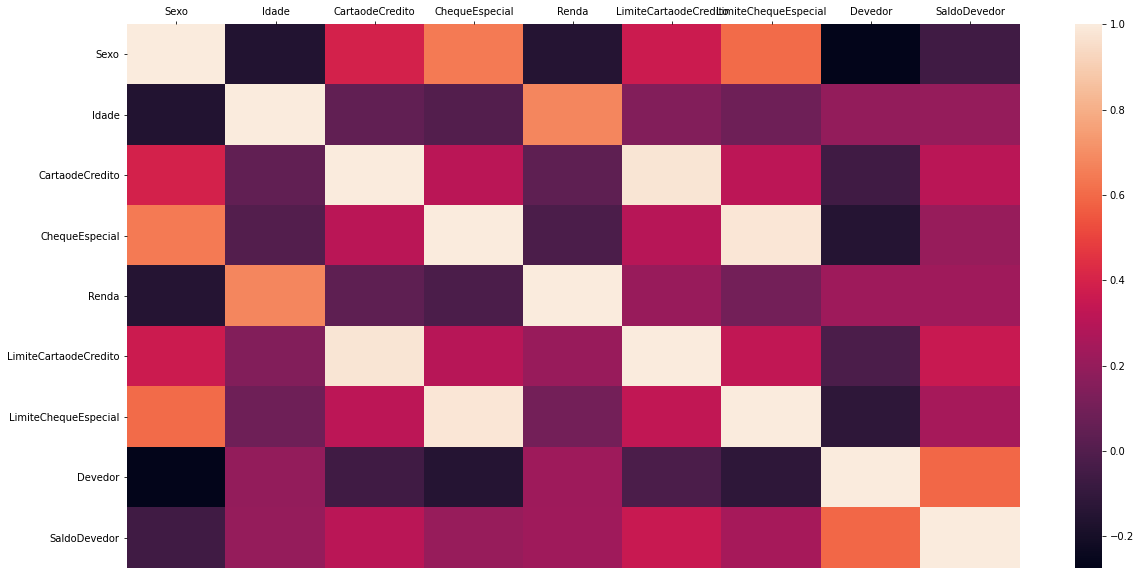

In [17]:
import seaborn as sns

corrmat =  df_amostra.corr()
corrmat

fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [18]:
# Dados mulheres

S1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1].cov()
n1 = len(df_amostra[df_amostra['Sexo']==1])
Xbarra1 = df_amostra[df_amostra['Sexo']==1].mean()
S1

,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor
Idade,9.855914,0.090323,0.160215,907.630989,1.573383e+03,1.360068e+03,0.021505
CartaodeCredito,0.090323,0.161290,-0.025806,42.703290,7.128339e+02,-3.017626e+01,0.019355
ChequeEspecial,0.160215,-0.025806,0.116129,9.473860,-8.959438e+01,3.374318e+02,-0.020430
Renda,907.630989,42.703290,9.473860,211575.419397,4.520597e+05,2.349786e+05,17.880688
LimiteCartaodeCredito,1573.382817,712.833935,-89.594376,452059.749922,3.545414e+06,1.940102e+05,104.674366
LimiteChequeEspecial,1360.068269,-30.176258,337.431828,234978.626875,1.940102e+05,1.187914e+06,-44.347871
Devedor,0.021505,0.019355,-0.020430,17.880688,1.046744e+02,-4.434787e+01,0.090323


In [19]:
n1

31

In [20]:
# Dados homens
S2 = df.iloc[:,1:8][df['Sexo']==0].cov()
n2 = len(df_amostra[df_amostra['Sexo']==0])
Xbarra2 = df_amostra[df_amostra['Sexo']==0].mean()
S2

,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor
Idade,15.503126,-0.024716,0.028504,1530.500155,7.437871e+02,3.557481e+02,0.041430
CartaodeCredito,-0.024716,0.238668,0.003039,-6.527132,1.053693e+03,7.902214e+00,0.001473
ChequeEspecial,0.028504,0.003039,0.150218,2.260385,1.498600e+01,4.464707e+02,0.004352
Renda,1530.500155,-6.527132,2.260385,240646.349643,1.154767e+05,5.165076e+04,2.773754
LimiteCartaodeCredito,743.787071,1053.693138,14.986003,115476.659727,4.868377e+06,7.295678e+04,7.124906
LimiteChequeEspecial,355.748102,7.902214,446.470735,51650.758400,7.295678e+04,1.371908e+06,16.766938
Devedor,0.041430,0.001473,0.004352,2.773754,7.124906e+00,1.676694e+01,0.193529


In [21]:
n2

69

In [22]:
S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)
S_pooled

,Idade,CartaodeCredito,ChequeEspecial,Renda,LimiteCartaodeCredito,LimiteChequeEspecial,Devedor
Idade,13.774387,0.010500,0.068824,1339.825921,9.977450e+02,6.631931e+02,0.035331
CartaodeCredito,0.010500,0.214981,-0.005791,8.543405,9.493485e+02,-3.754461e+00,0.006947
ChequeEspecial,0.068824,-0.005791,0.139783,4.468591,-1.702840e+01,4.130915e+02,-0.003235
Renda,1339.825921,8.543405,4.468591,231747.085282,2.185123e+05,1.077715e+05,7.398325
LimiteCartaodeCredito,997.744952,949.348484,-17.028399,218512.299583,4.463388e+06,1.100140e+05,36.986985
LimiteChequeEspecial,663.193051,-3.754461,413.091478,107771.534464,1.100140e+05,1.315583e+06,-1.941677
Devedor,0.035331,0.006947,-0.003235,7.398325,3.698699e+01,-1.941677e+00,0.161935


In [23]:
def T2Hotelling_duas_amostras(df1, df2, delta0):
    n1 = len(df1)
    n2 = len(df2)
    p = len(df1.columns)
    Xbarra1=df1.mean()
    Xbarra2=df2.mean()
    S1 = df1.cov()
    S2 = df2.cov()
    S_pooled = ((n1-1)*S1 + (n2-1)*S2)/(n1+n2-2)
    S_pooled_inv = np.linalg.inv(S_pooled)
    
    T2Hotelling_duas_amostras = np.array(Xbarra1-Xbarra2-delta0).T.dot(S_pooled_inv).dot(np.array(Xbarra1-Xbarra2-delta0)) / (n1+n2-2)
    qf = f.ppf(0.95, p , (n1+n2-2), loc=0, scale=1)
    teste = T2Hotelling_duas_amostras > (n1+n2-2) * p / (n1+n2-p-1) * qf
    pvalor = 1-f.cdf(T2Hotelling_duas_amostras/((n1+n2-2) * p / (n1+n2-p-1) ), p, (n1+n2-2))
    print('Rejeitamos H0') if teste else print('Não rejeitamos H0')
    print('Valor da estatística', T2Hotelling_duas_amostras)
    print('valor p', pvalor)

In [24]:
df1 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==1]
df2 = df_amostra.iloc[:,1:8][df_amostra['Sexo']==0]

delta0 = [0,0,0,0,0,0,0]

T2Hotelling_duas_amostras(df1,df2,delta0)


Não rejeitamos H0
Valor da estatística 0.05027388876482565
valor p 0.9999998142670615


## Testes de hipóteses para a comparação de médias em amostras correlacionadas

Sejam 


- $\underline{X}_{11},\ldots,\underline{X}_{1n}$ vetores $p\times 1$ que representam uma amostra aleatória de uma população normal multivariada **antes** de um tratamento com $E(\underline{X}_{1j})=\underline{\mu}_1$ para $j=1,\ldots,n$,


- $\underline{X}_{21},\ldots,\underline{X}_{2n}$ vetores $p\times 1$ que representam uma amostra aleatória de uma população normal multivariada **após** de um tratamento com $E(\underline{X}_{2j})=\underline{\mu}_2$ para $j=1,\ldots,n$,
			   
sendo que $\underline{X}_{11},\ldots,\underline{X}_{1n}$ e $\underline{X}_{21},\ldots,\underline{X}_{2n}$ são amostras aleatórias de uma mesma população em diferentes situações, em que $\underline{X}_{1j}$ e $\underline{X}_{2j}$ são correlacionadas (por exemplo, vetores aleatórios de medições antes e após um tratamento).


Sejam $\underline{\mu}_1$ e $\underline{\mu}_2$ os vetores de médias em situações 1 e 2, respectivamente. Essas situações podem não ser, necessariamente, antes e após um tratamento, mas são situções que indicam que as amostras estão correlacionadas. 


Deseja-se testar se não há diferença entre as situações 1 e 2 para verificar, por exemplo, que o tratamento não produz nenhum efeito, ou seja, se $\underline{\mu}_1 = \underline{\mu}_2$, ou equivalentemente se as médias são iguais em outra situação.
			   
               
Para avaliar as hipóteses 


$\begin{array}{l}H_0:\underline{\mu}_1=\underline{\mu}_2\mbox{ contra }\\H_1:\underline{\mu}_1\neq\underline{\mu}_2\end{array}$
			   
vamos considerar as diferenças
			
$\underline{D}_j =  \underline{X}_{1j}-\underline{X}_{2j}.$
			
Assim, $\underline{D}_1,\ldots,\underline{D}_n$ são i.i.d e $\underline{D}_j\sim N(\underline{\mu}_D, \Sigma_D)$.

Então, avaliamos se 
			
			
$\begin{array}{l}H_0:\underline{\mu}_D=\underline{0}\mbox{ contra }\\H_1:\underline{\mu}_D\neq\underline{0}\end{array}$
			
com a estatística $T^2$ de Hotelling:
			   
$T^2 = n(\bar{\underline{D}}-\underline{0})^\top S_D^{-1} (\bar{\underline{D}}-\underline{0})\stackrel{sob \ H_0}{\sim} \displaystyle\frac{(n-1)p}{n-p}F_{p,n-p},$

em que $\bar{\underline{D}}$ e $S_D$ são o vetor de médias e a matriz de variâncias e covariâncias amostrais de $\underline{D}$.

			

Um teste análogo poderia ser desenvolvido para avaliar
			
$\begin{array}{l}H_0:\underline{\mu}_D=\underline{\mu}_{D0}\mbox{ contra }\\H_1:\underline{\mu}_D\neq\underline{\mu}_{D0}\end{array}$
			   
com a estatística $T^2$ de Hotelling:

$T^2 = n(\bar{\underline{D}}-\underline{\mu}_{D0})^\top S_D^{-1} (\bar{\underline{D}}-\underline{\mu}_{D0})\stackrel{ sob \ H_0}{\sim} \displaystyle\frac{(n-1)p}{n-p}F_{p,n-p},$


em que $\bar{\underline{D}}$ e $S_D$ são o vetor de médias e a matriz de variâncias e covariâncias amostrais de $\underline{D}$.

A região de confiança, com nível de confiança $100(1-\alpha)\%$ nesse caso seria 

$\{\underline{\mu}_D^\star; n(\bar{\underline{D}}-\underline{\mu}_{D}^\star)^\top S_D^{-1} (\bar{\underline{D}}-\underline{\mu}_{D}^\star) \leq  \displaystyle\frac{(n-1)p}{n-p}q_{F_{p,n-p,\alpha} }\}$


em que $\bar{\underline{D}}$ e $S_D$ são o vetor de médias e a matriz de variâncias e covariâncias amostrais de $\underline{D}$.
			            
            
            

### Simulação: Amostras pareadas

In [32]:
mean = [0, 0, 0]
mean1 = [1, 0, 0]

cov1 = [[2,1,0],[1,3,1],[0,1,4]]  
cov2 = [[0.01,0,0],[0,0.01,0],[0,0,0.01]]

X1 = np.random.multivariate_normal(mean, cov1, 50)
X2 = X1 + np.random.multivariate_normal(mean1, cov2, 50)

In [33]:
X = np.concatenate((X1,X2), axis=1)
X.shape

(50, 6)

In [35]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5
0,0.261877,0.046456,0.261620,1.416220,0.167972,0.132674
1,0.464519,2.394549,0.885394,1.526491,2.339389,0.870196
2,2.021625,3.896733,-1.190946,2.935779,3.718885,-1.122018
3,-2.452283,0.394880,1.681235,-1.447742,0.200366,1.630899
4,0.149504,0.614691,1.686946,1.173363,0.617707,1.710605


In [41]:
df.mean()

0    0.090345
1   -0.025920
2    0.425570
3    1.103482
4   -0.021276
5    0.415850
dtype: float64

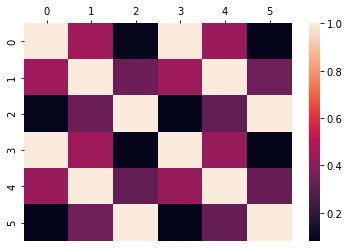

In [36]:
corrmat =  df.corr()
corrmat

sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [38]:
df_diff =  pd.DataFrame((X1-X2))

In [39]:
df_diff.head()

,0,1,2
0,-1.154342,-0.121516,0.128946
1,-1.061971,0.055160,0.015198
2,-0.914153,0.177847,-0.068929
3,-1.004541,0.194513,0.050337
4,-1.023858,-0.003016,-0.023659


In [40]:
mu0=[0,0,0]
n=len(df_diff)
p=len(df_diff.columns)
T2Hotelling(df_diff, mu0, n, p)

Rejeitamos H0
Valor da estatística 5666.660411153529
valor p 1.1102230246251565e-16
